In [1]:
from DatasetGenerator import DatasetGenerator
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
dataset_generator = DatasetGenerator()

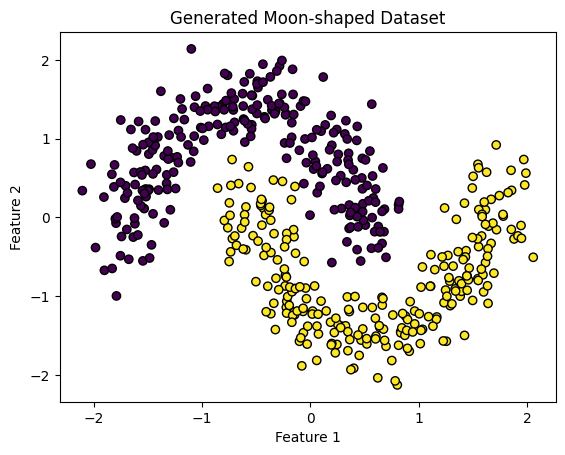

In [3]:
nonlinear_dataset = dataset_generator.get_nonlinear_dataset()
plt.scatter(nonlinear_dataset['Feature1'], nonlinear_dataset['Feature2'], c=nonlinear_dataset['Label'], cmap='viridis', marker='o', edgecolors='k')
plt.title("Generated Moon-shaped Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [4]:
def plot_svm (clf, X_train, y_train, X_test, y_test):
    x0s = np.linspace(min(X_train[:,0])-0.5,max(X_train[:,0])+0.5, 100)
    x1s = np.linspace(min(X_train[:,1])-0.5,max(X_train[:,1])+0.5, 100)
    x0, x1 = np.meshgrid(x0s,x1s) 
    X_mesh = np.c_[x0.ravel(), x1.ravel()] 
    y_pred = clf.predict(X_mesh).reshape(x0.shape) 
    y_decision = clf.decision_function(X_mesh).reshape(x0.shape)

    plt.figure(figsize=(16, 9)) 
    plt.scatter(X_train[:, 0][y_train==0], X_train[:, 1][y_train==0], s=80, c="g", label="Class 0")
    plt.scatter(X_train[:, 0][y_train==1], X_train[:, 1][y_train==1], s=80, c="b", label="Class 1")
    plt.scatter(X_test[:, 0][y_test==0], X_test[:, 1][y_test==0], s=80, c="g")
    plt.scatter(X_test[:, 0][y_test==1], X_test[:, 1][y_test==1], s=80, c="b")

    plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=80, c="r", label="Support Vectors")

    plt.contourf(x0,x1, y_pred, cmap = plt.cm.brg, alpha = 0.1)
    plt.contourf(x0,x1, y_decision, cmap = plt.cm.brg, alpha = 0.2)
    plt.contour(x0, x1, y_decision, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    plt.legend(loc="lower right")
    plt.axis("auto")
    plt.grid(True, which='both')
    plt.xlabel("x1")
    plt.ylabel("x2") 

In [5]:
def tune(model, params, X_train, y_train):
    rnd_search = RandomizedSearchCV(model, param_distributions =params, n_iter = 50, cv = 5, random_state=40)
    rnd_search.fit(X_train, y_train)
    print("best hyper-parameter value: ", rnd_search.best_params_)
    best_model = rnd_search.best_estimator_
    return best_model

# POLY

The polynomial kernel is defined as $(\gamma \langle x, x'\rangle + r)^d$

d is the degree of the polynomial, $\gamma$ is a scale factor, and r is a constant term (also known as the coefficient).

    - The degree d controls the flexibility of the decision boundary. Higher degrees allow more complex boundaries but can lead to overfitting.
    - The polynomial kernel maps input features into a polynomial feature space of a specified degree, enabling it to capture interactions between features up to that degree.
    - It's well-suited for problems where all the training data is normalized.
    
 Good for datasets where relationships between features are expected to be of a certain degree or polynomial in nature

In [6]:
X = np.array(nonlinear_dataset[['Feature1', 'Feature2']].values)
y = np.array(nonlinear_dataset['Label'].to_list())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = SVC(kernel="poly")
parameters = {"coef0":randint(low=0, high=5),"C": uniform(0,20), "degree": randint(low=2, high=5), "gamma":uniform(0, 1)}
best_model = tune(model, parameters, X_train, y_train)

best hyper-parameter value:  {'C': 9.007011739345423, 'coef0': 2, 'degree': 4, 'gamma': 0.6238122128846867}


In [8]:
y_pred = best_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        43
           1       1.00      0.98      0.99        57

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



In [9]:
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Confusion Matrix:
[[43  0]
 [ 1 56]]


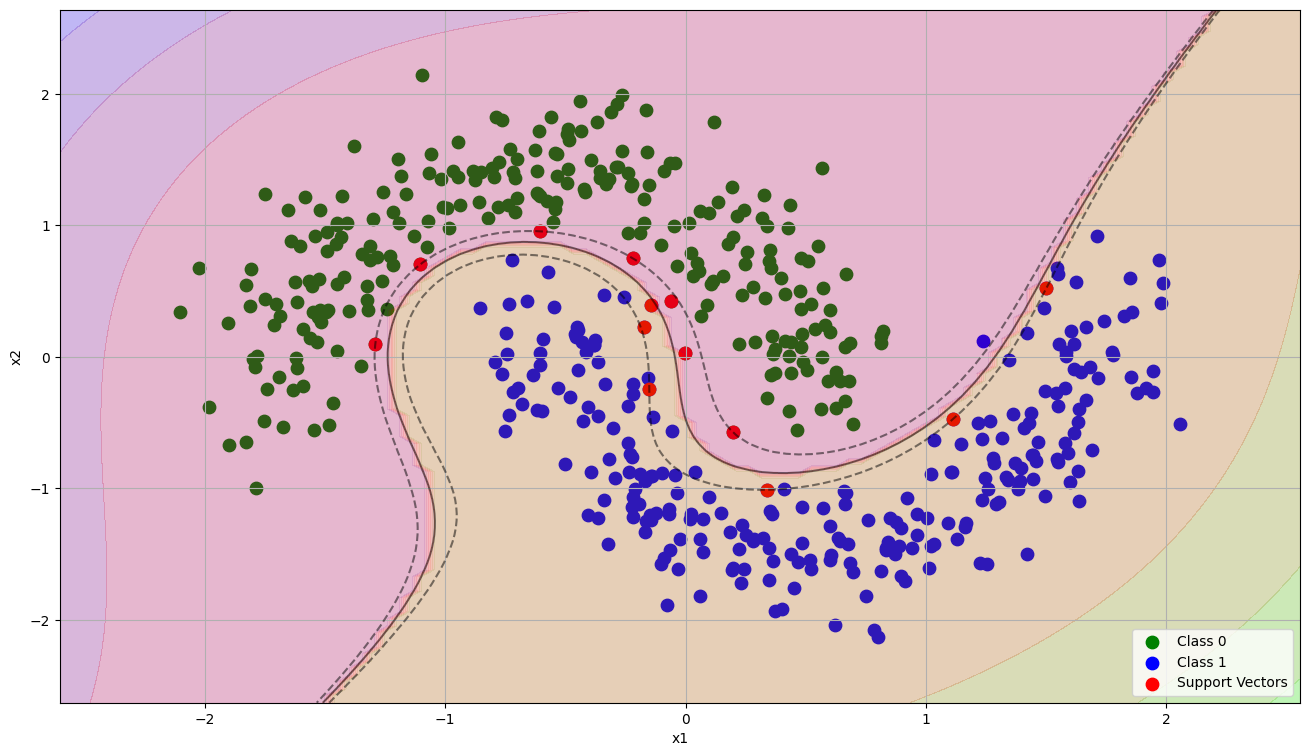

In [10]:
#with best parameters
plot_svm (best_model, X_train, y_train, X_test, y_test)

# POLY test parameter

hyper-parameter value:  {'C': float 0 to 20, 'coef0': 2, 'degree': 4, 'gamma': 0.6238122128846867}


### Effect of Changing `C` on Polynomial Kernel SVM

- **Decision Boundary**: With a higher `C`, the decision boundary will try to accommodate more data points correctly, potentially leading to more intricate shapes in the decision space. With a lower `C`, the decision boundary will be smoother and possibly more linear, even if it means some training data points are misclassified.
  
- **Support Vectors**: A higher `C` may result in more support vectors as the model tries to correctly classify more points. A lower `C` may have fewer support vectors, as the model is more tolerant of misclassifications.

- **Performance Metrics**: As `C` increases, you might observe higher accuracy on the training dataset but potentially lower performance on the test dataset due to overfitting. Conversely, a lower `C` might result in lower training accuracy but potentially better generalization to the test data.

- **Computation Time**: Higher values of `C` might require more computation time because the optimization algorithm may take longer to converge, especially if it's trying to fit a complex model.

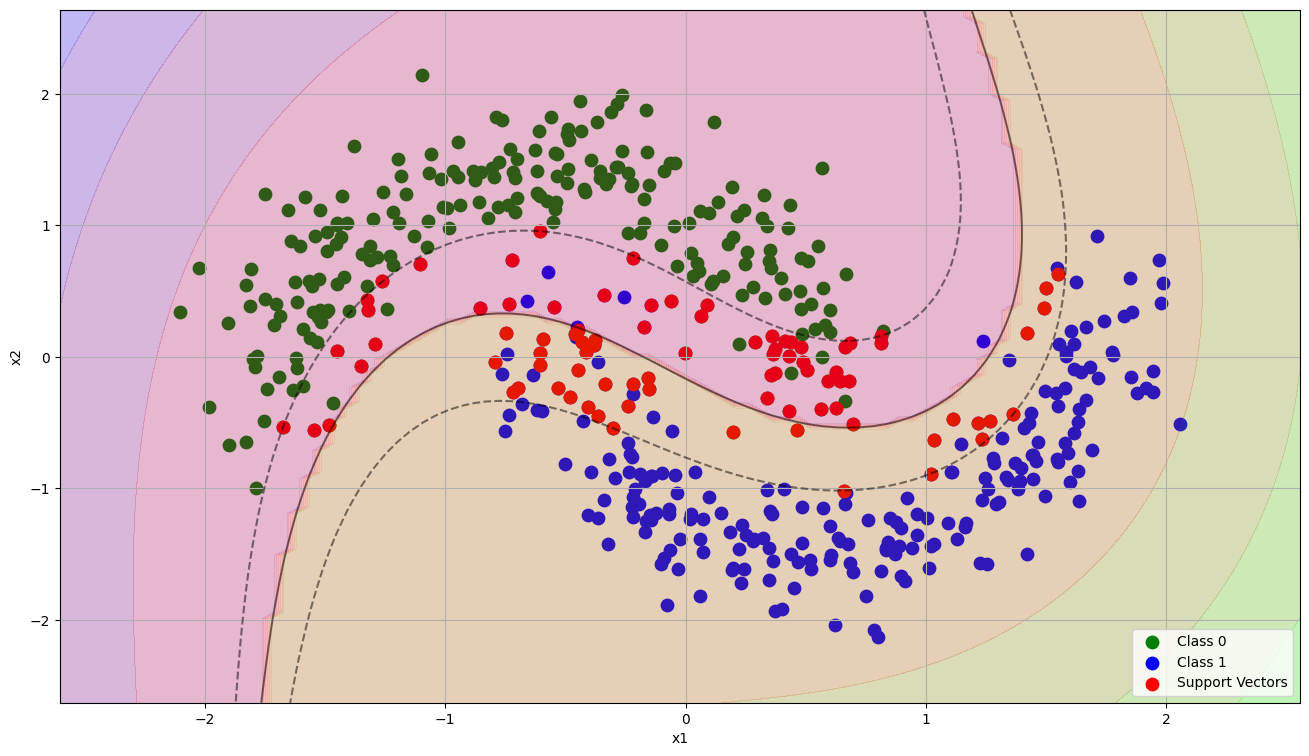

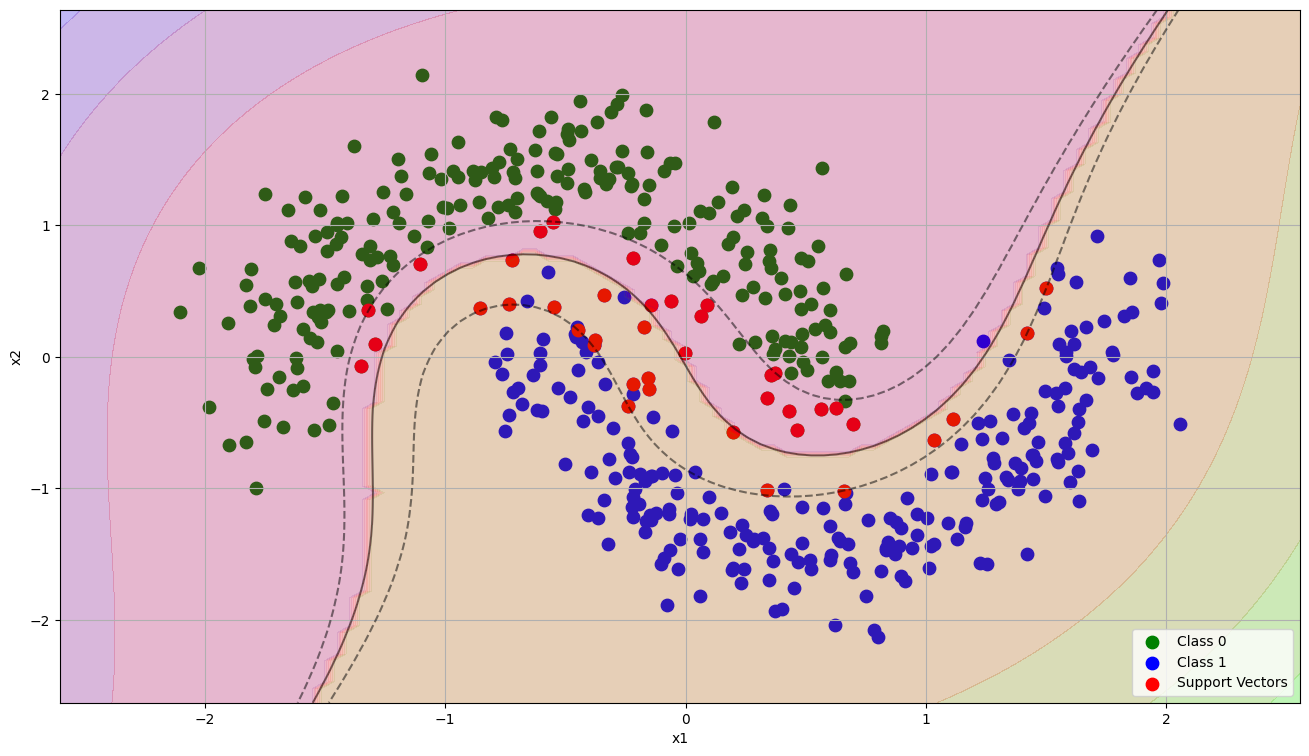

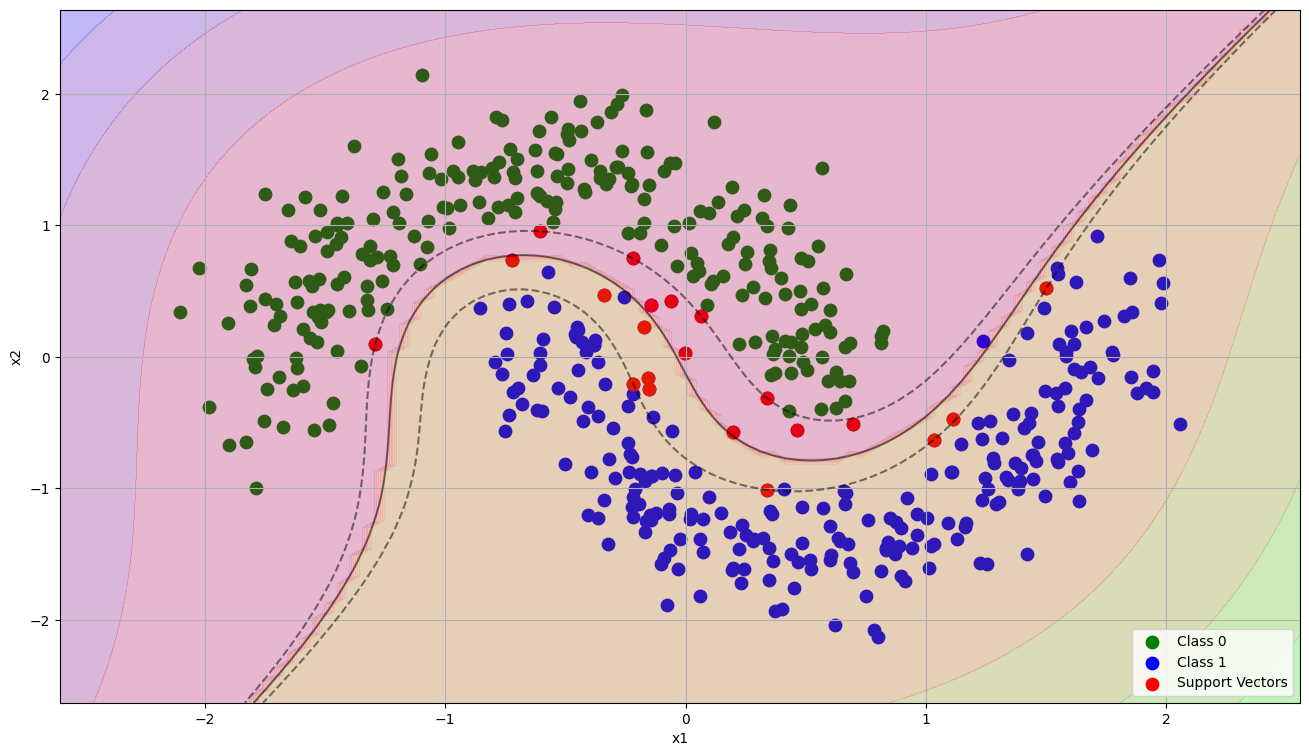

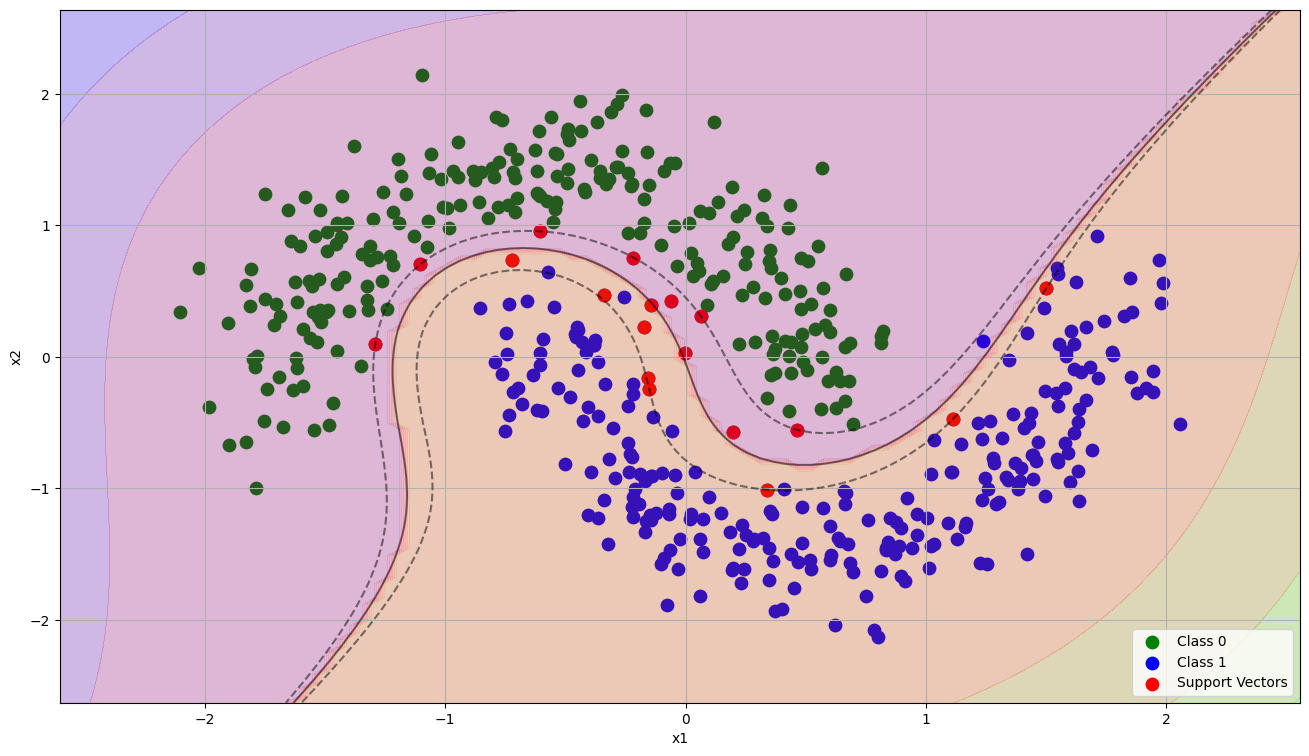

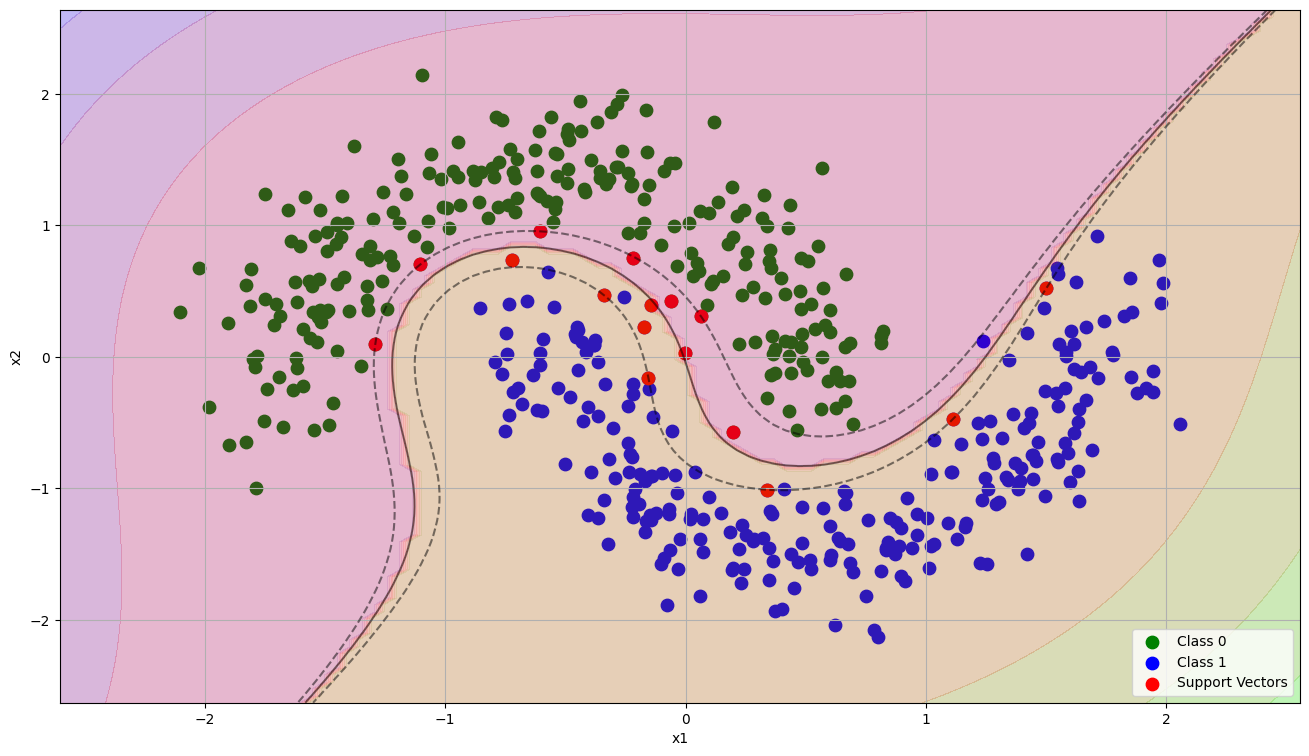

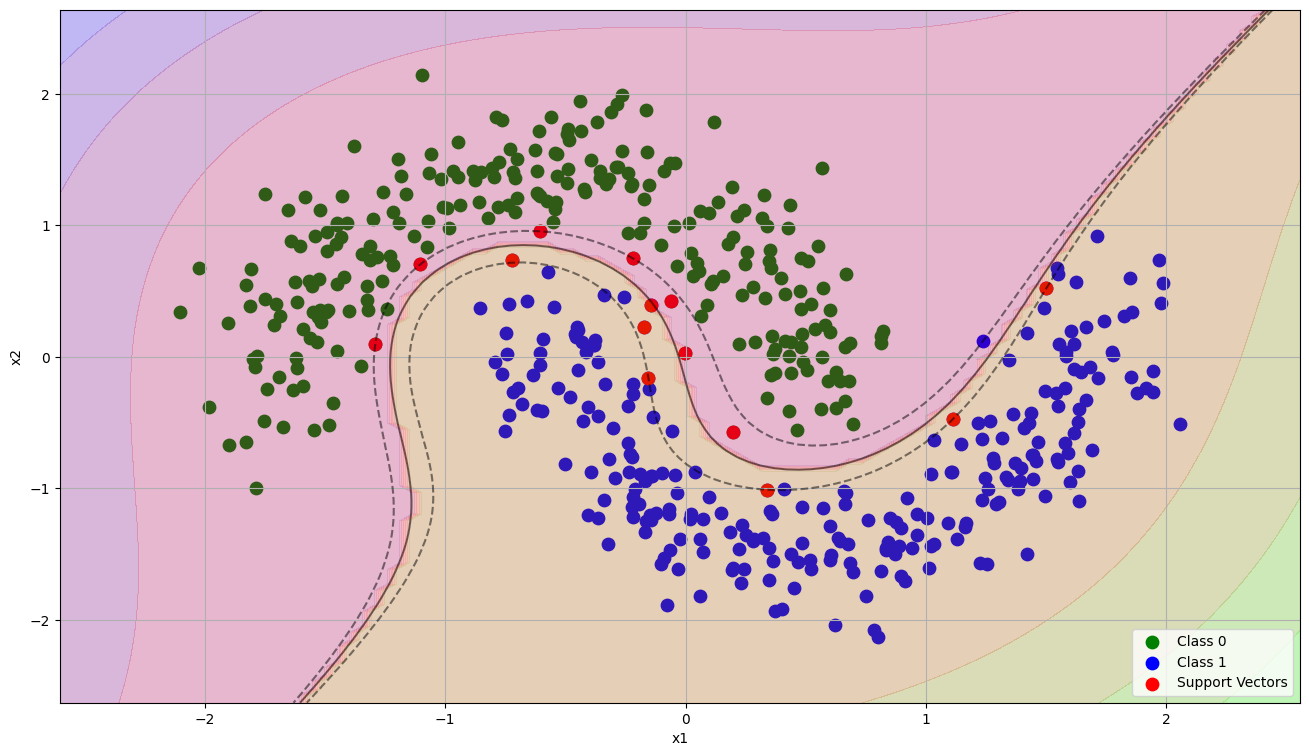

In [11]:
C_values = [0.1, 1, 5, 10, 15, 20]
for C_val in C_values:
    model = SVC(kernel='poly')
    model.C = C_val
    model.coef0 = 2
    model.degreee = 4
    model.gamma = 0.6238122128846867
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    plot_svm(model, X_train, y_train, X_test, y_test)

hyper-parameter value:  {'C': 9.007011739345423, 'coef0': 2, 'degree': integer 0 to 5, 'gamma': 0.6238122128846867}

Changing the degree of the polynomial kernel in an SVM model affects the complexity and the shape of the decision boundary that the model learns. 

### Effect of Changing `Degree` on Polynomial Kernel SVM

- **Decision Boundary Complexity**: Higher degrees create more complex decision boundaries. This can be beneficial for datasets with complex patterns but can lead to overfitting on simpler datasets.

- **Overfitting Risks**: As the degree increases, the model becomes more prone to overfitting, especially if you have limited training data or if the data does not have complex, high-degree polynomial relationships.

- **Computational Cost**: Higher-degree polynomials are computationally more expensive. Training time and prediction time can increase with the degree of the polynomial.

- **Performance Metrics**: The model's performance metrics (like accuracy, precision, recall) will vary depending on how well the chosen degree matches the complexity of the relationships in the data.

- **Number of Support Vectors**:
   - With a low degree (such as 1, which is linear), the model can only capture simple relationships.
   - The number of support vectors may be More since the decision boundary is less flexible.
   - A higher degree allows the model to create more complex, curved decision boundaries.
   - This typically leads to Lower support vectors, as the model tries to fit the more intricate patterns in the data.

In [ ]:
degree_values = [0, 1, 2, 3, 4, 5]
for degree_val in degree_values:
    model = SVC(kernel='poly')
    model.C = 9.007011739345423
    model.coef0 = 2
    model.degree = degree_val
    model.gamma = 0.6238122128846867
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    plot_svm(model, X_train, y_train, X_test, y_test)

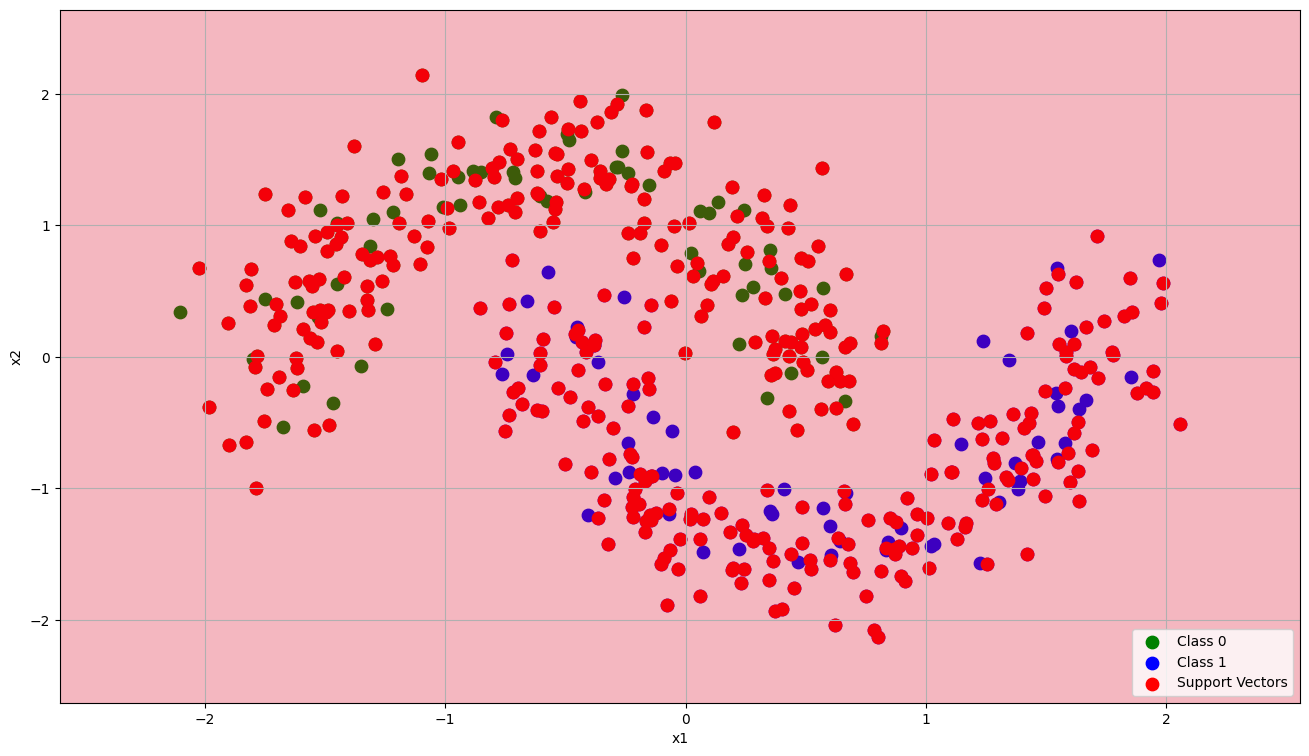

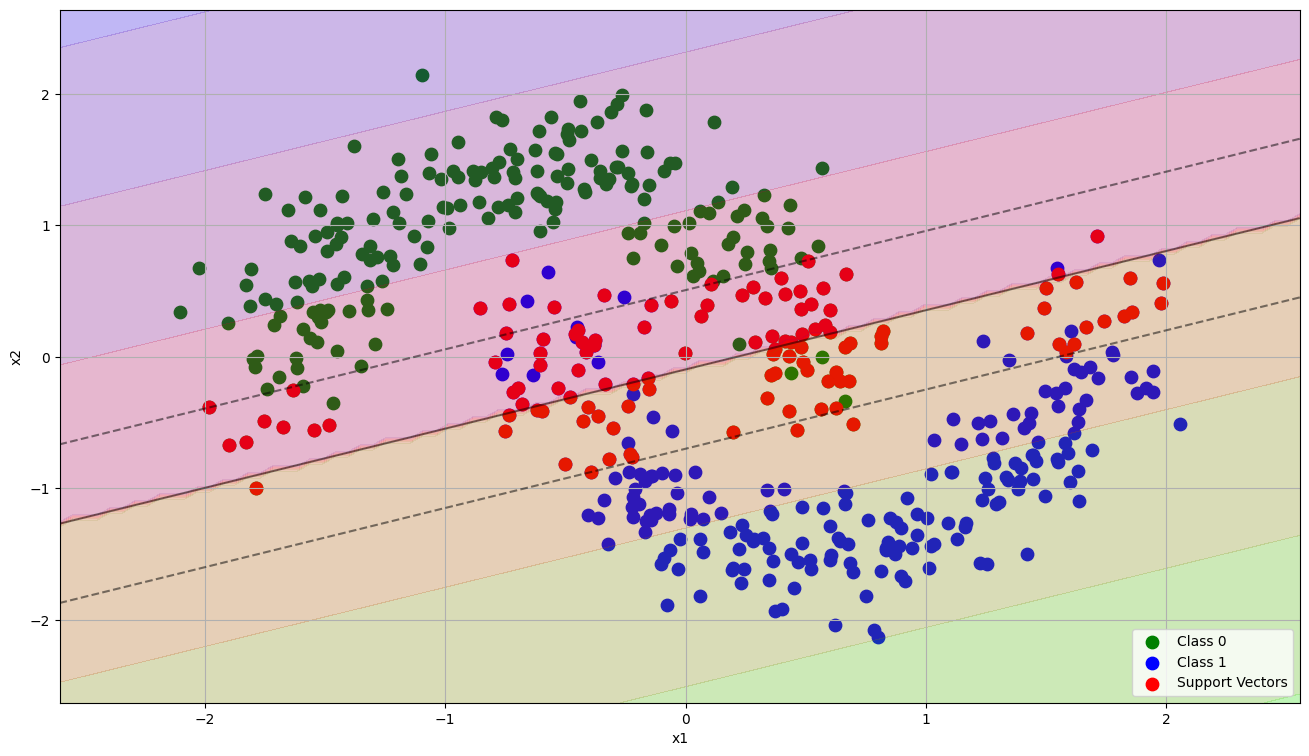

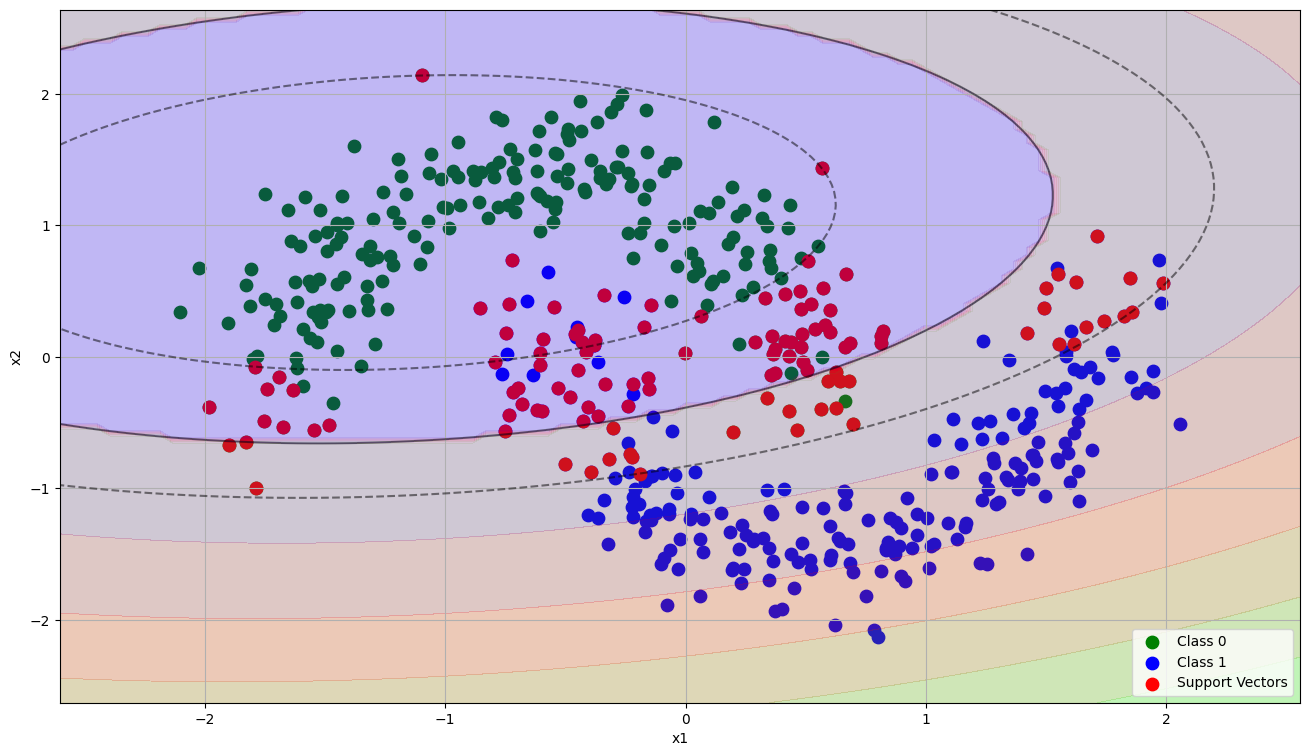

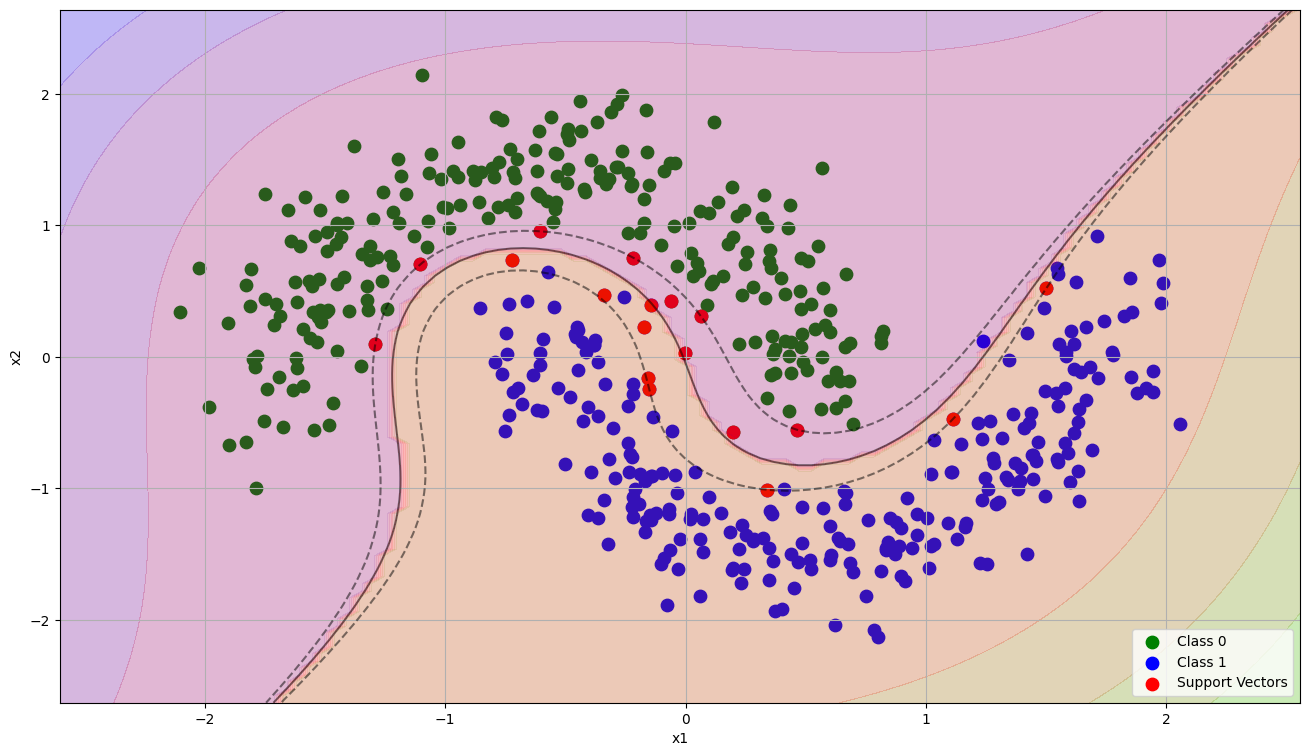

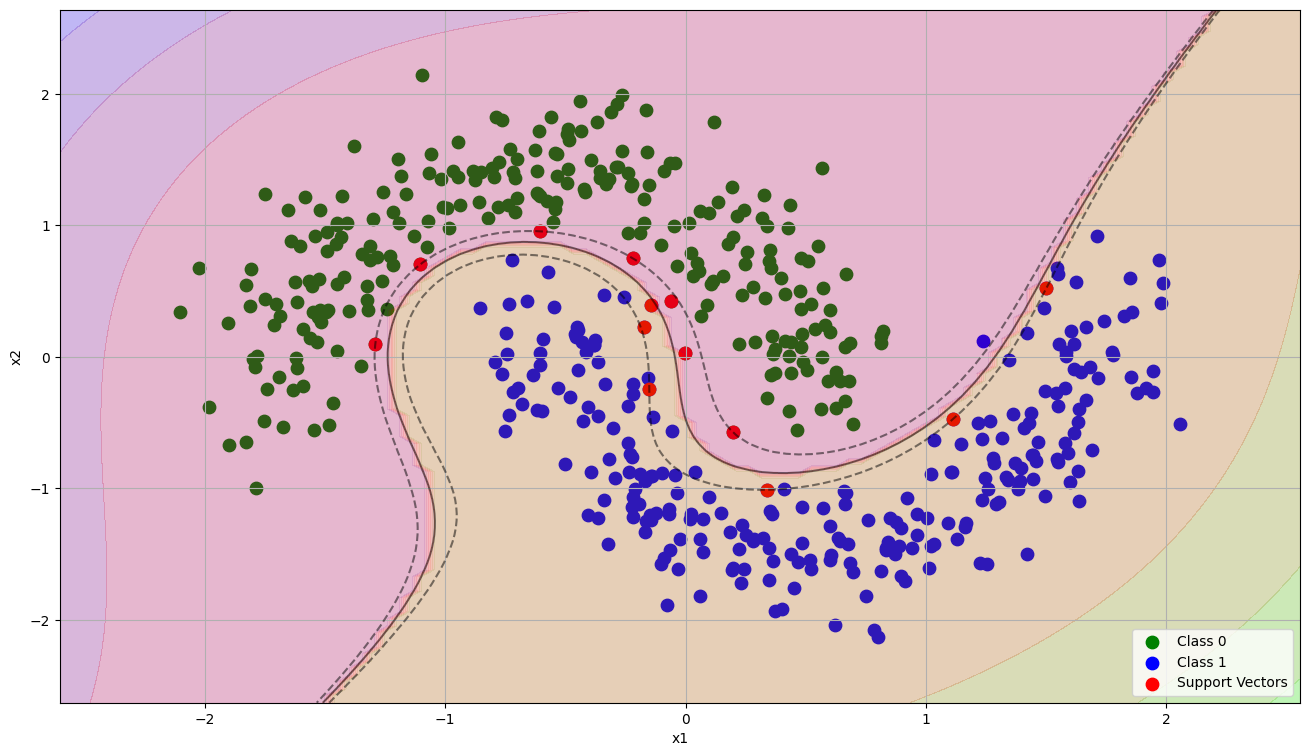

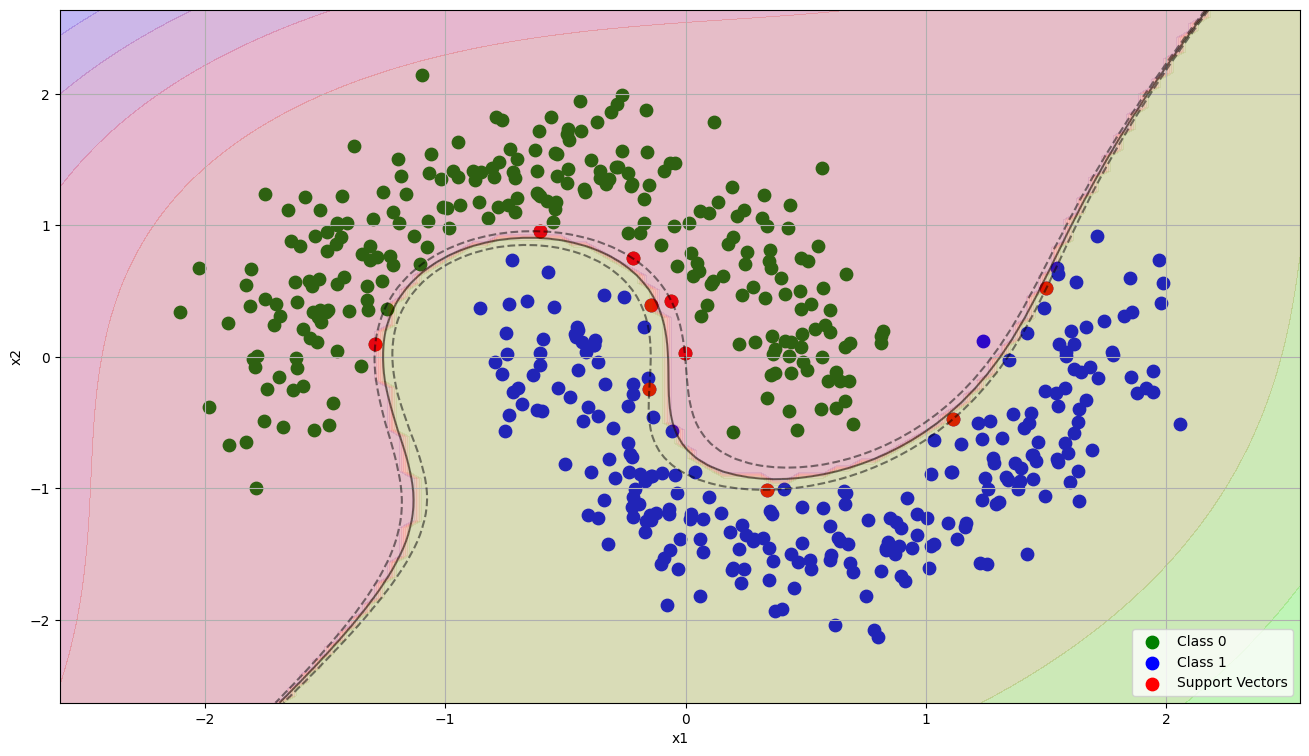

In [23]:
degree_values = [0, 1, 2, 3, 4, 5]
for degree_val in degree_values:
    model = SVC(kernel='poly')
    model.C = 9.007011739345423
    model.coef0 = 2
    model.degree = degree_val
    model.gamma = 0.6238122128846867
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    plot_svm(model, X_train, y_train, X_test, y_test)

hyper-parameter value:  {'C': 9.007011739345423, 'coef0': 2, 'degree': 4, 'gamma': float 0 to 1}

The `gamma` parameter influences the trade-off between bias and variance, affecting the number of support vectors, the shape of decision and marginal boundaries, the model's complexity, and the training and test error rates.

### Impact of Changing `gamma`:

1. **Low `gamma` Values (e.g., 0, 0.01)**:
   - **Support Vectors**: More support vectors are typically selected as the model is less sensitive to the specific features of the training data.
   - **Decision and Marginal Boundaries**: More generalized decision boundaries with broader margins.
   - **Complexity**: The model is simpler and less prone to overfitting.
   - **Train and Test Error**: Lower training accuracy but potentially better generalization, leading to lower test error.

2. **Moderate `gamma` Values (e.g., 0.2, 0.5)**:
   - **Support Vectors**: A moderate number of support vectors are used, indicating a balanced approach to fitting the data.
   - **Decision and Marginal Boundaries**: The decision boundaries are more complex than with low `gamma` but not overly tailored to the training data.
   - **Complexity**: Increased complexity compared to low `gamma`, but still reasonable to avoid severe overfitting.
   - **Train and Test Error**: Better training accuracy than low `gamma`, and good generalization if the `gamma` value is well-tuned.

3. **High `gamma` Values (e.g., 0.8, 1)**:
   - **Support Vectors**: Fewer support vectors are likely to be used as the model becomes highly sensitive to the training data.
   - **Decision and Marginal Boundaries**: Highly complex and tightly fitted to the training data, with narrow margins.
   - **Complexity**: Increased model complexity, with a high risk of overfitting.
   - **Train and Test Error**: High training accuracy but potentially high test error due to overfitting.


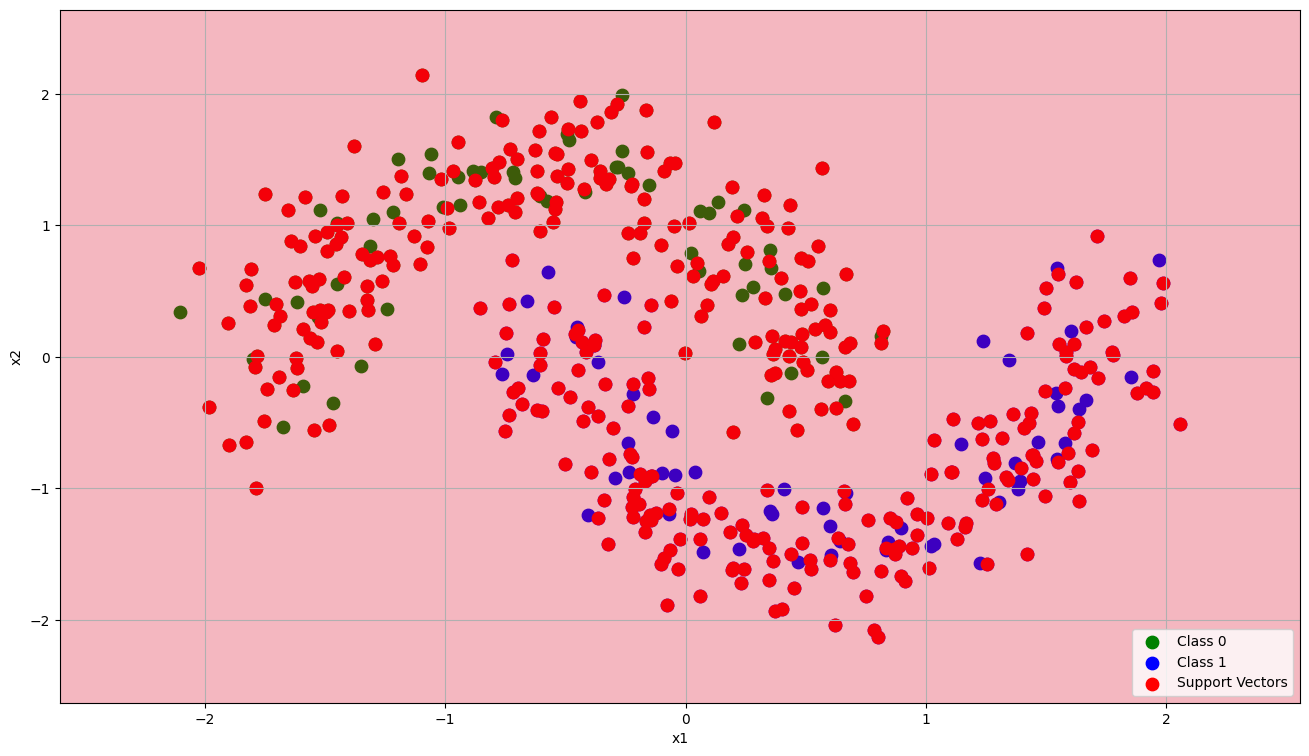

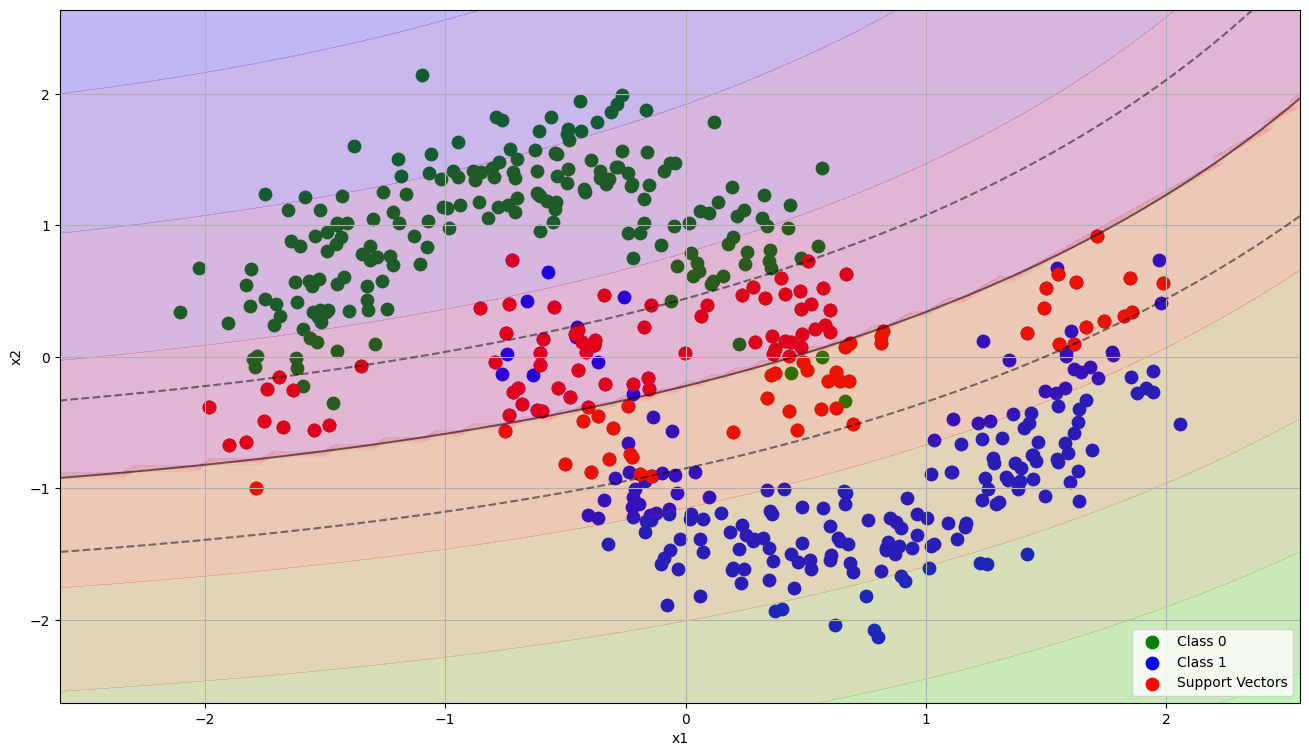

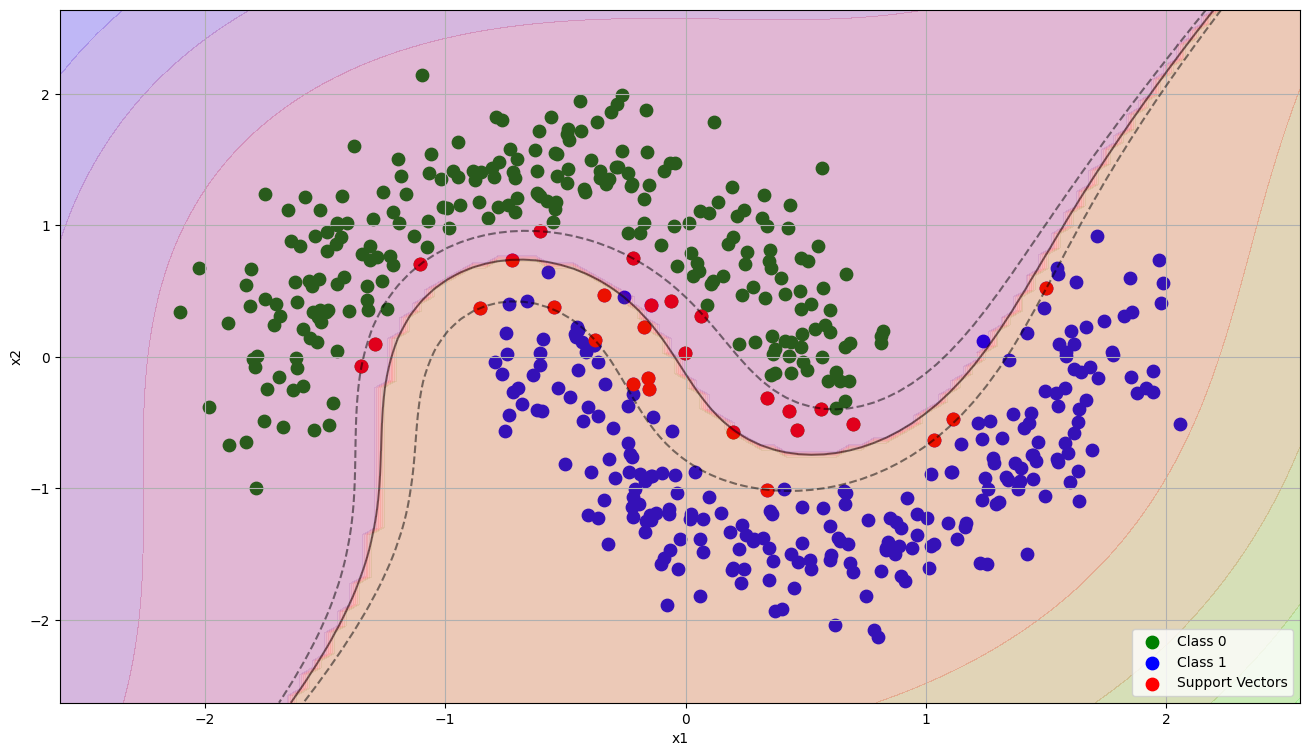

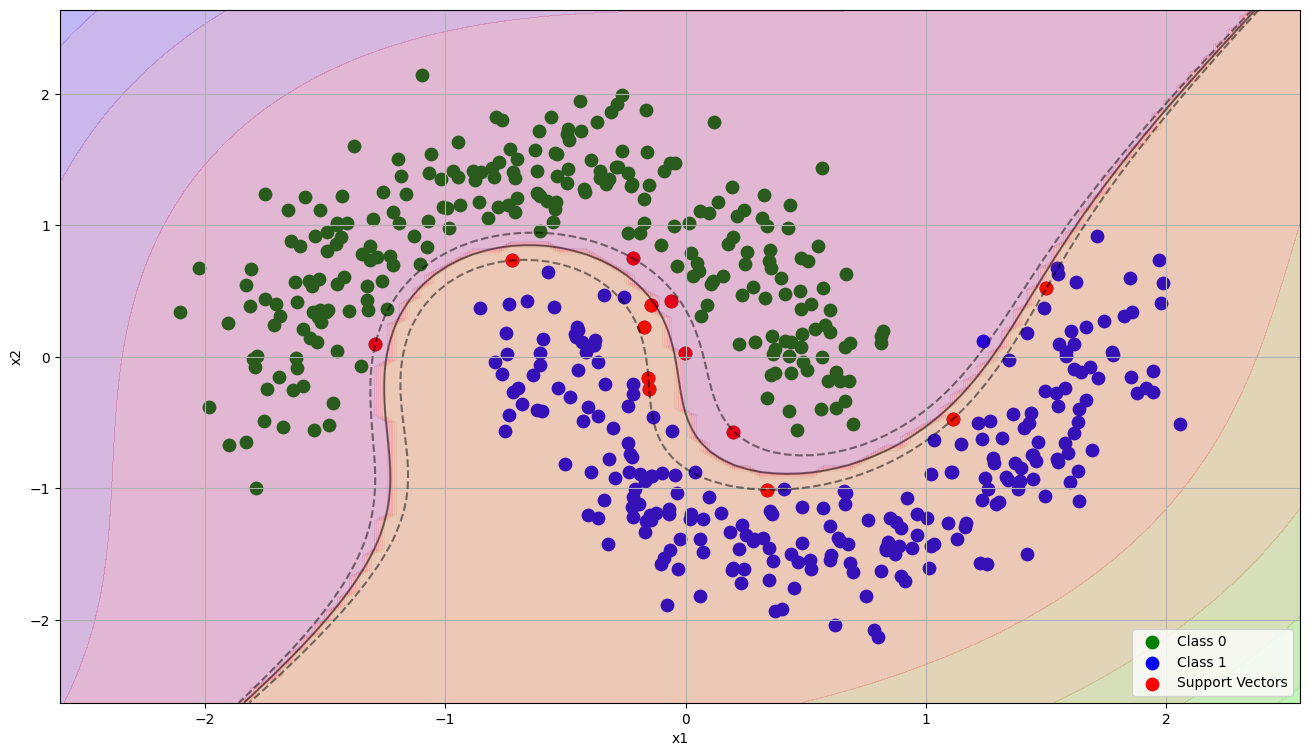

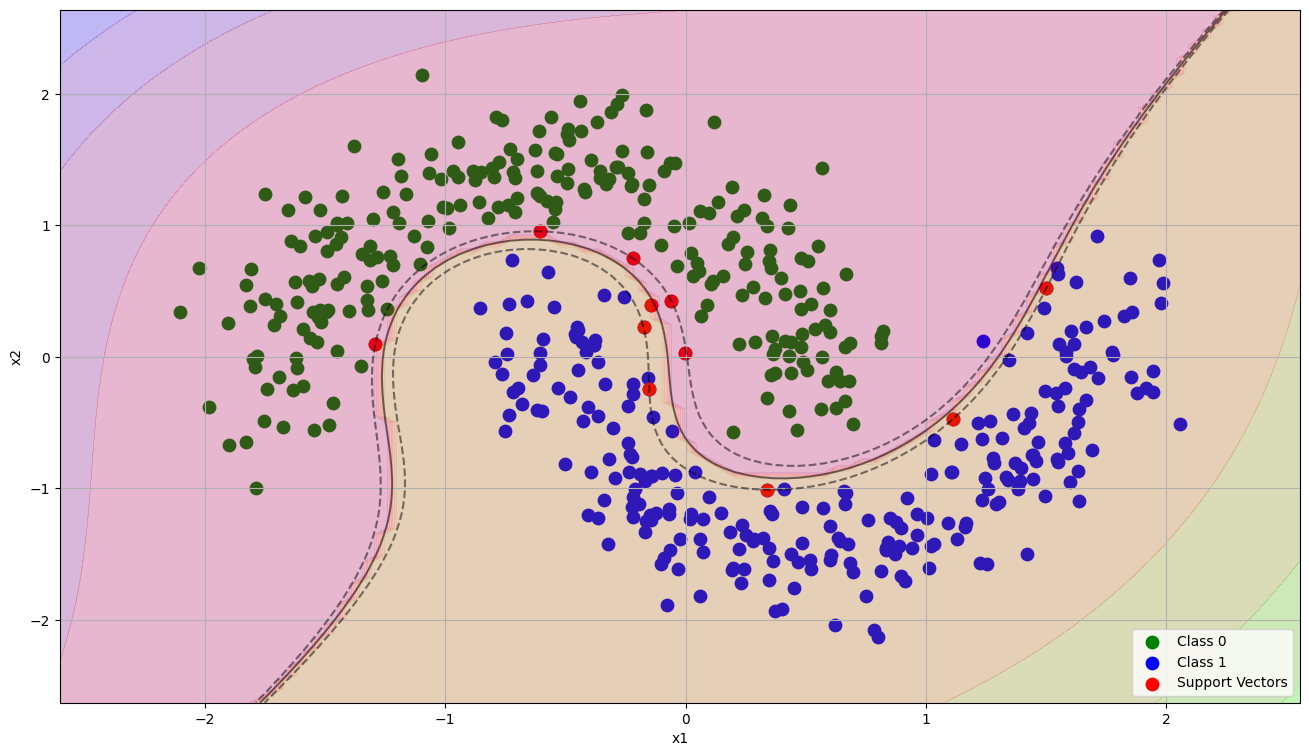

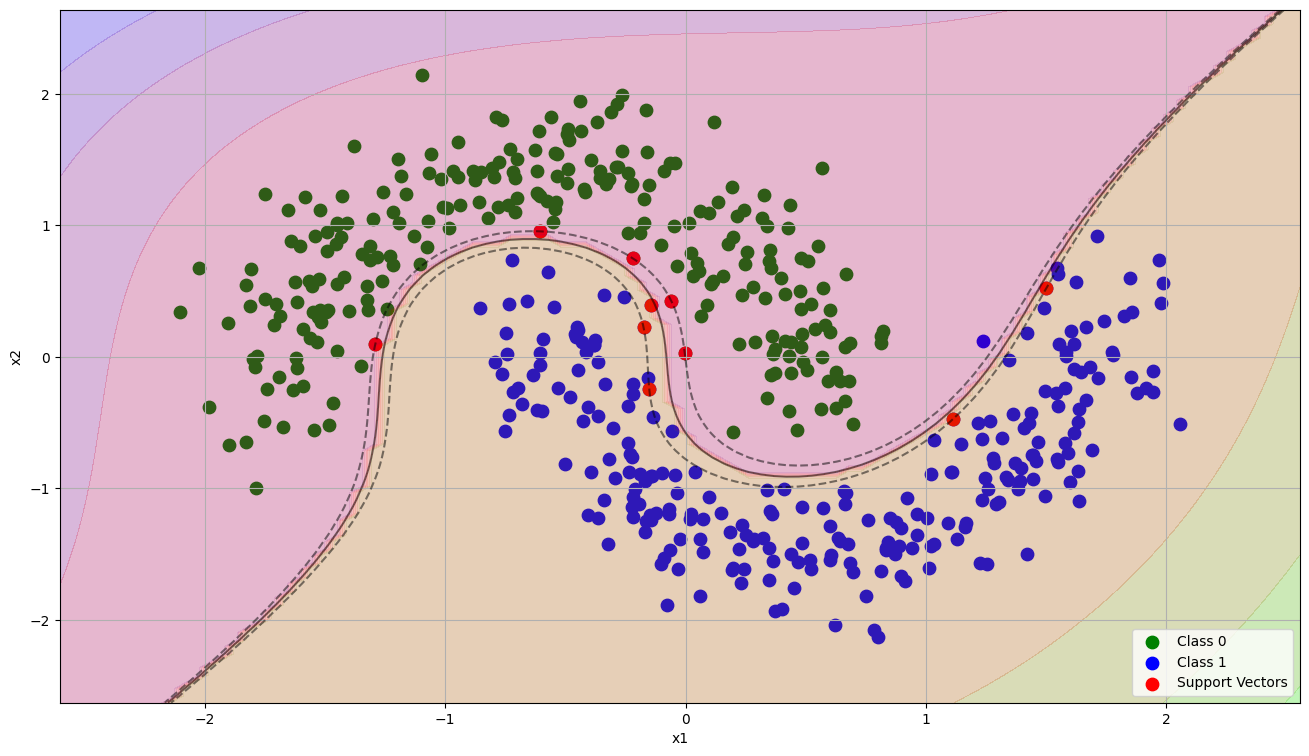

In [24]:
gamma_values = [0, 0.01, 0.2, 0.5, 0.8, 1]
for gamma_val in gamma_values:
    model = SVC(kernel='poly')
    model.C = 9.007011739345423
    model.coef0 = 2
    model.degree = 4
    model.gamma = gamma_val
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    plot_svm(model, X_train, y_train, X_test, y_test)

hyper-parameter value:  {'C': 9.007011739345423, 'coef0': integer 0 to 5, 'degree': 4, 'gamma': 0.6238122128846867}


### Impact of Changing `coef0`:

1. **Low `coef0` Values (e.g., 0, 1)**:
   - **Influence on Polynomial**: Puts more emphasis on higher-order terms in the polynomial, as the constant term (independent of the features) has less influence.
   - **Decision Boundaries**: May lead to more complex decision boundaries, especially in higher dimensions, as the model focuses more on the interactions between features.
   - **Support Vectors**: The number of support vectors can vary; it depends on how the model's complexity aligns with the data structure.

2. **Moderate to High `coef0` Values (e.g., 2, 3, 4, 5)**:
   - **Influence on Polynomial**: Increases the influence of lower-order terms. This can be beneficial if the relationship between features and target variable is not purely based on high-order interactions.
   - **Decision Boundaries**: Potentially smoother decision boundaries compared to very low `coef0` values, as lower-order interactions are given more weight.
   - **Support Vectors**: There may be fewer support vectors if the decision boundary becomes smoother.


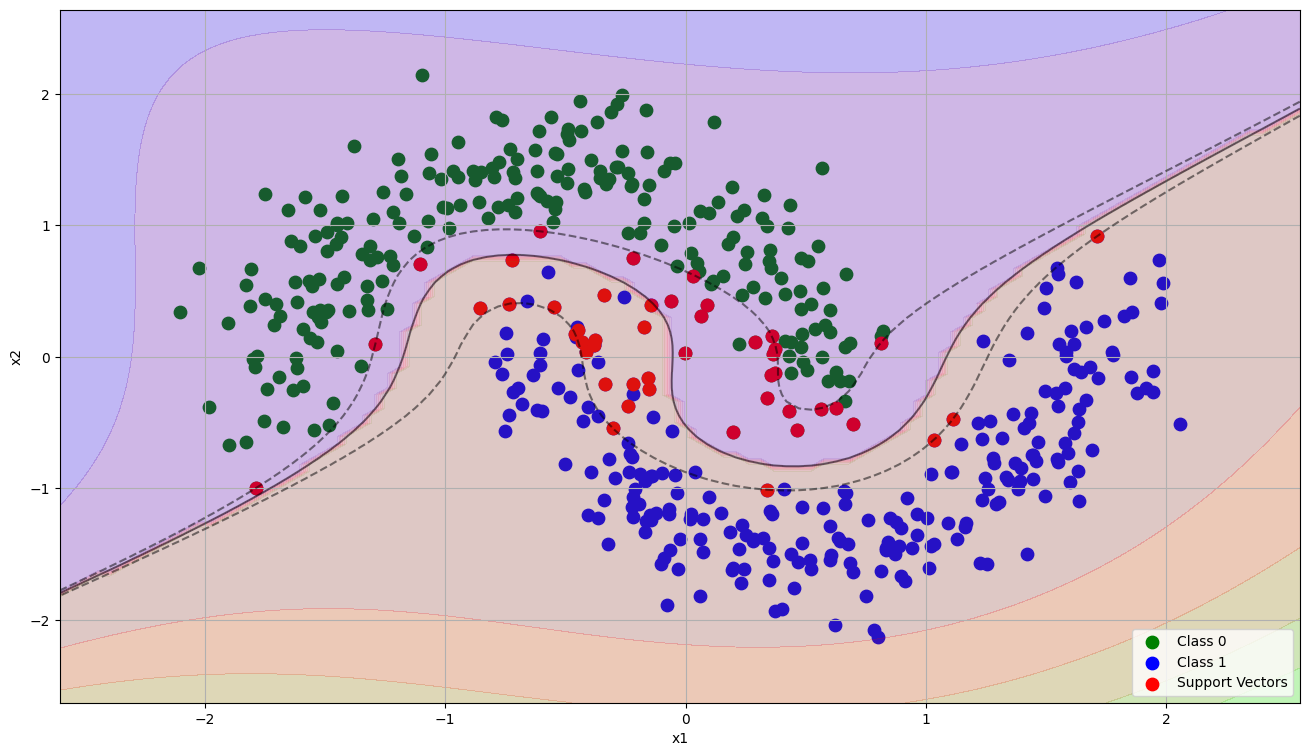

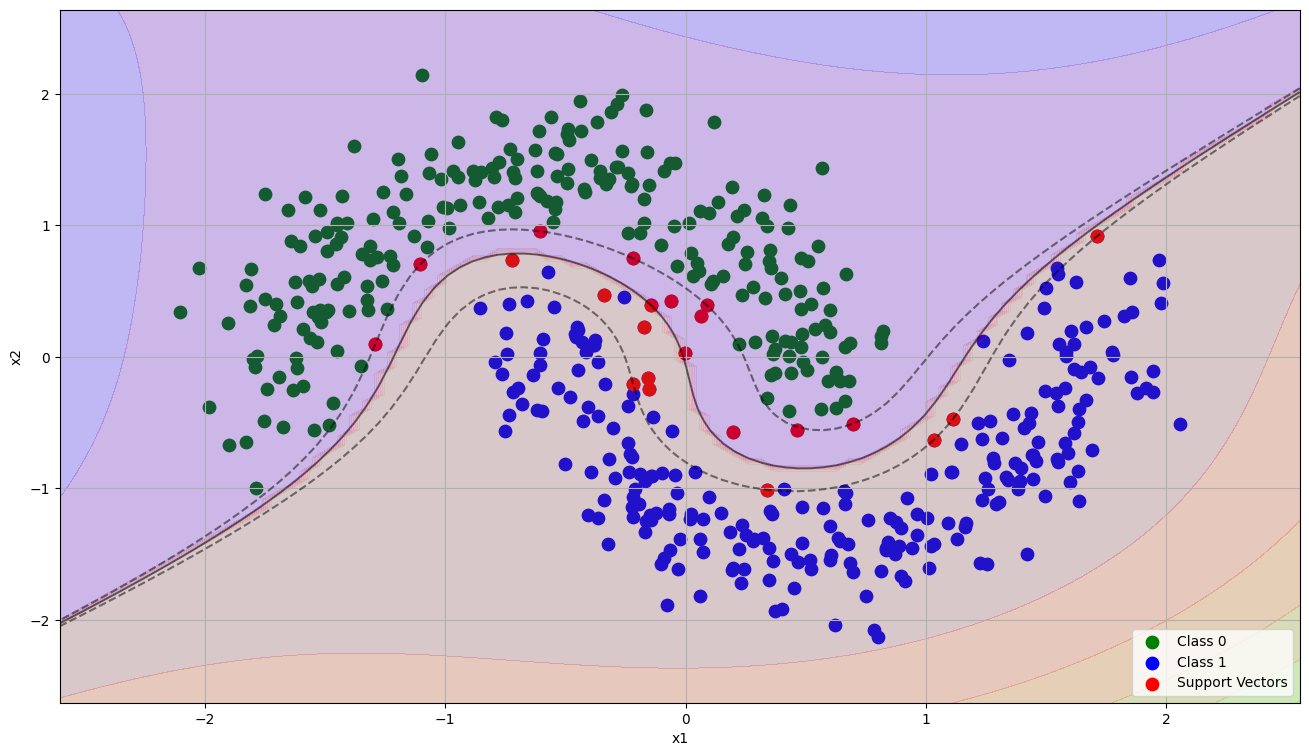

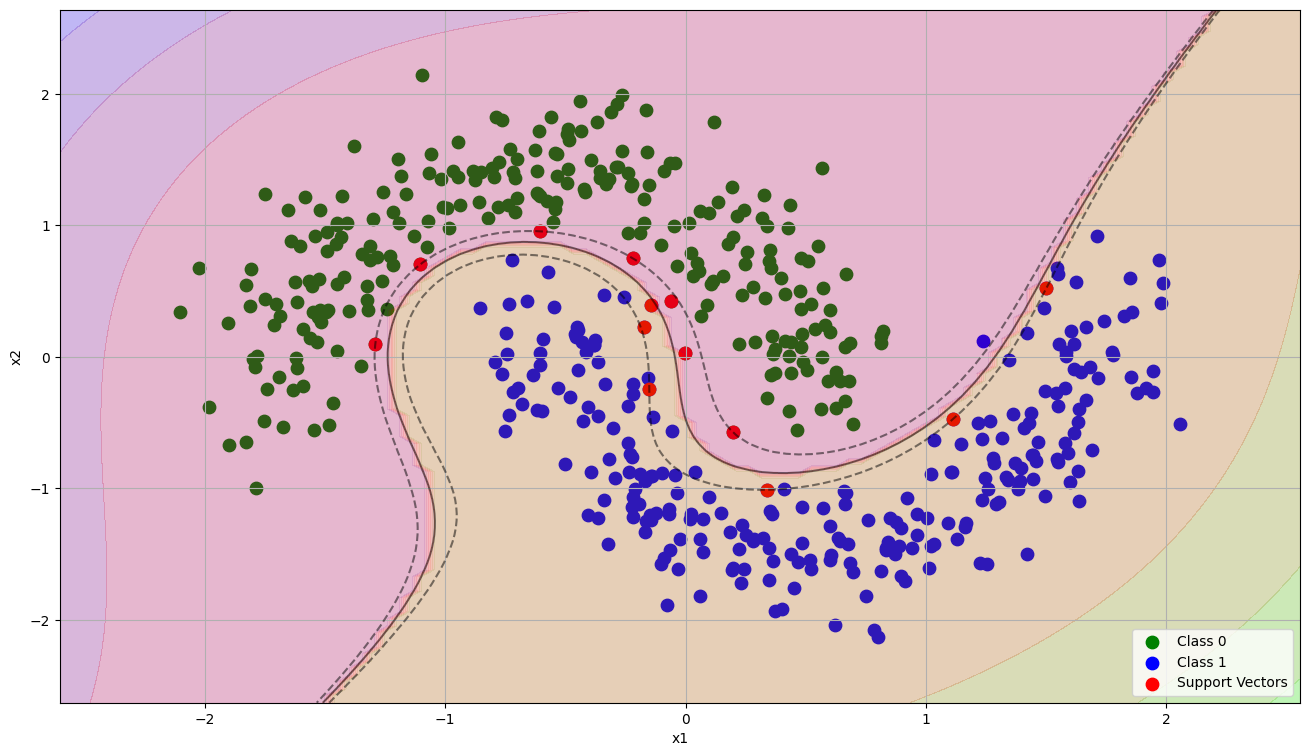

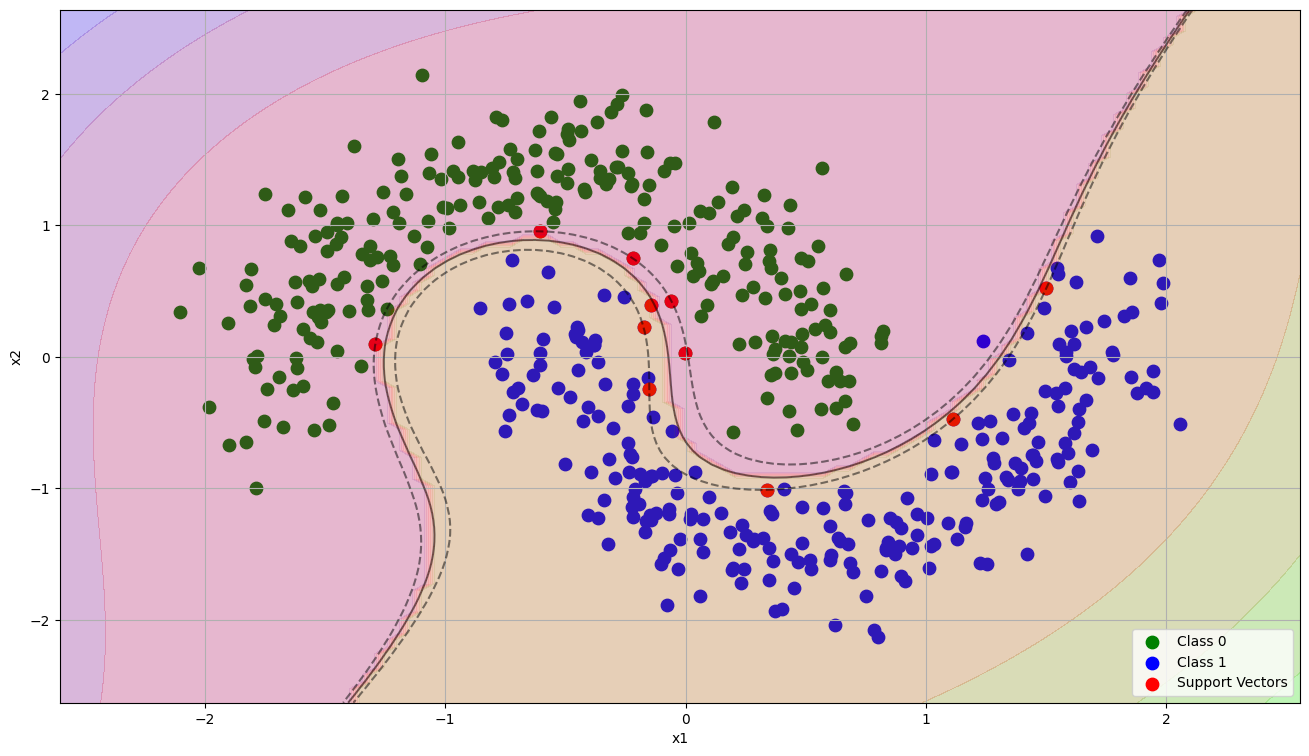

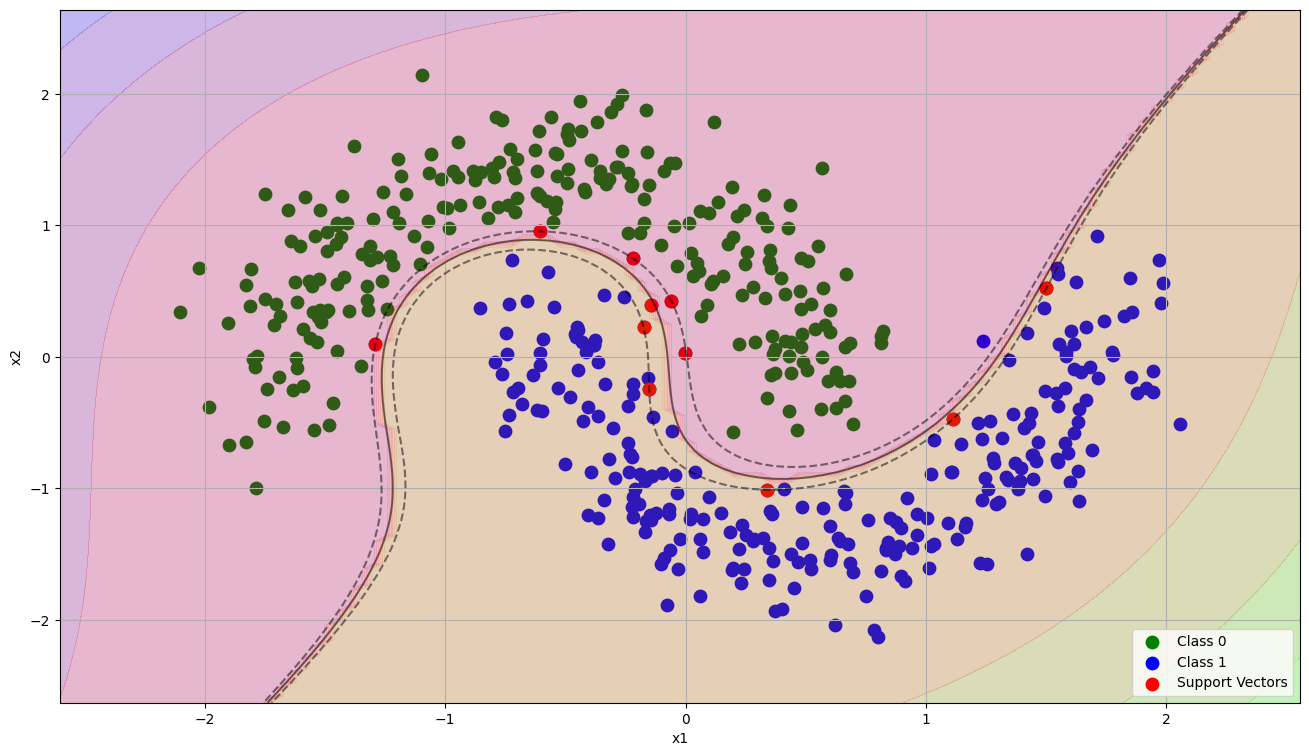

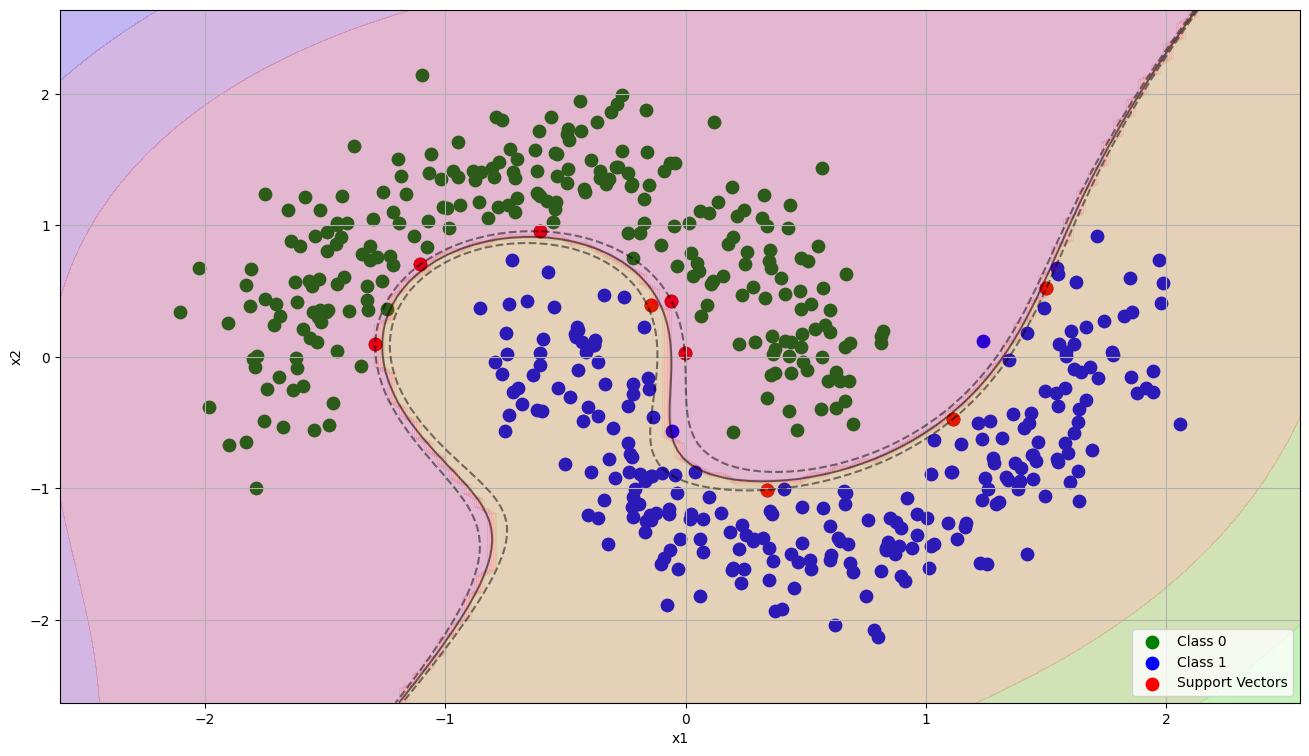

In [17]:
coef0_values = [0.25, 0.5, 2, 3, 4, 10]
for coef0_val in coef0_values:
    model = SVC(kernel='poly')
    model.C = 9.007011739345423
    model.coef0 = coef0_val
    model.degree = 4
    model.gamma = 0.6238122128846867
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    plot_svm(model, X_train, y_train, X_test, y_test)